# Veryfying the trigger LPP Read

## Photodiode and triggers

Verifying that the photodiode has jitter...

In [28]:
# Open the raw file for a random sub, random run
filepath = '/media/co/T7/workspace-LPP/data/MEG/LPP/PallierRead2023/download/sub-1/ses-01/meg/sub-1_ses-01_task-read_run-01_meg.fif' 

import mne
raw = mne.io.read_raw_fif(filepath, preload=True, allow_maxshield=True, verbose=True)
print(raw)


Opening raw data file /media/co/T7/workspace-LPP/data/MEG/LPP/PallierRead2023/download/sub-1/ses-01/meg/sub-1_ses-01_task-read_run-01_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 24000 ... 535999 =     24.000 ...   535.999 secs
Ready.
Reading 0 ... 511999  =      0.000 ...   511.999 sec

<ipython-input-28-238bf25df425>:5: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne.io.read_raw_fif(filepath, preload=True, allow_maxshield=True, verbose=True)


<Raw | sub-1_ses-01_task-read_run-01_meg.fif, 346 x 512000 (512.0 s), ~1.33 GB, data loaded>


In [29]:
events = mne.find_events(raw, stim_channel='MISC006', verbose=True, shortest_event=0.0001)

In [34]:
# Get the raw data from MISC006
raw_misc006 = raw.copy().pick_channels(['MISC006'])

# Extract the spike 
spike = raw_misc006.get_data()

Removing projector <Projection | grad_ssp_upright.fif : PCA-v1, active : False, n_channels : 306>
Removing projector <Projection | grad_ssp_upright.fif : PCA-v2, active : False, n_channels : 306>
Removing projector <Projection | grad_ssp_upright.fif : PCA-v3, active : False, n_channels : 306>
Removing projector <Projection | grad_ssp_upright.fif : PCA-v4, active : False, n_channels : 306>
Removing projector <Projection | grad_ssp_upright.fif : PCA-v5, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v1, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v2, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v3, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v4, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v5, active : False, n_channels : 306>
Removing projector <Proje

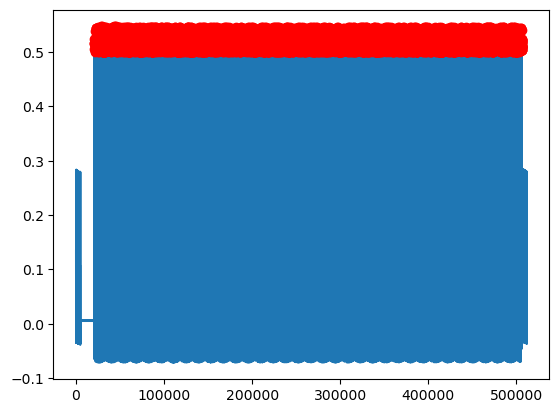

In [41]:
# Set a thresh old: 0.5
# Get the time points where the spike is above the threshold
spike = spike[:1000]
threshold = 0.5
spike_times = (spike > threshold).nonzero()[1]
# Plot in a different color the time points where the spike is above the threshold
import matplotlib.pyplot as plt
plt.plot(spike[0])
plt.plot(spike_times, spike[0, spike_times], 'ro')
plt.show()


Using notebook 3d backend.



/home/co/miniconda3/envs/meg/lib/python3.9/site-packages/pyvista/plotting/plotting/__init__.py:23: PyVistaDeprecationWarning: The `pyvista.plotting.plotting` module has been deprecated. `_ALL_PLOTTERS` is now imported as: `from pyvista.plotting import _ALL_PLOTTERS`.
  warnings.warn(


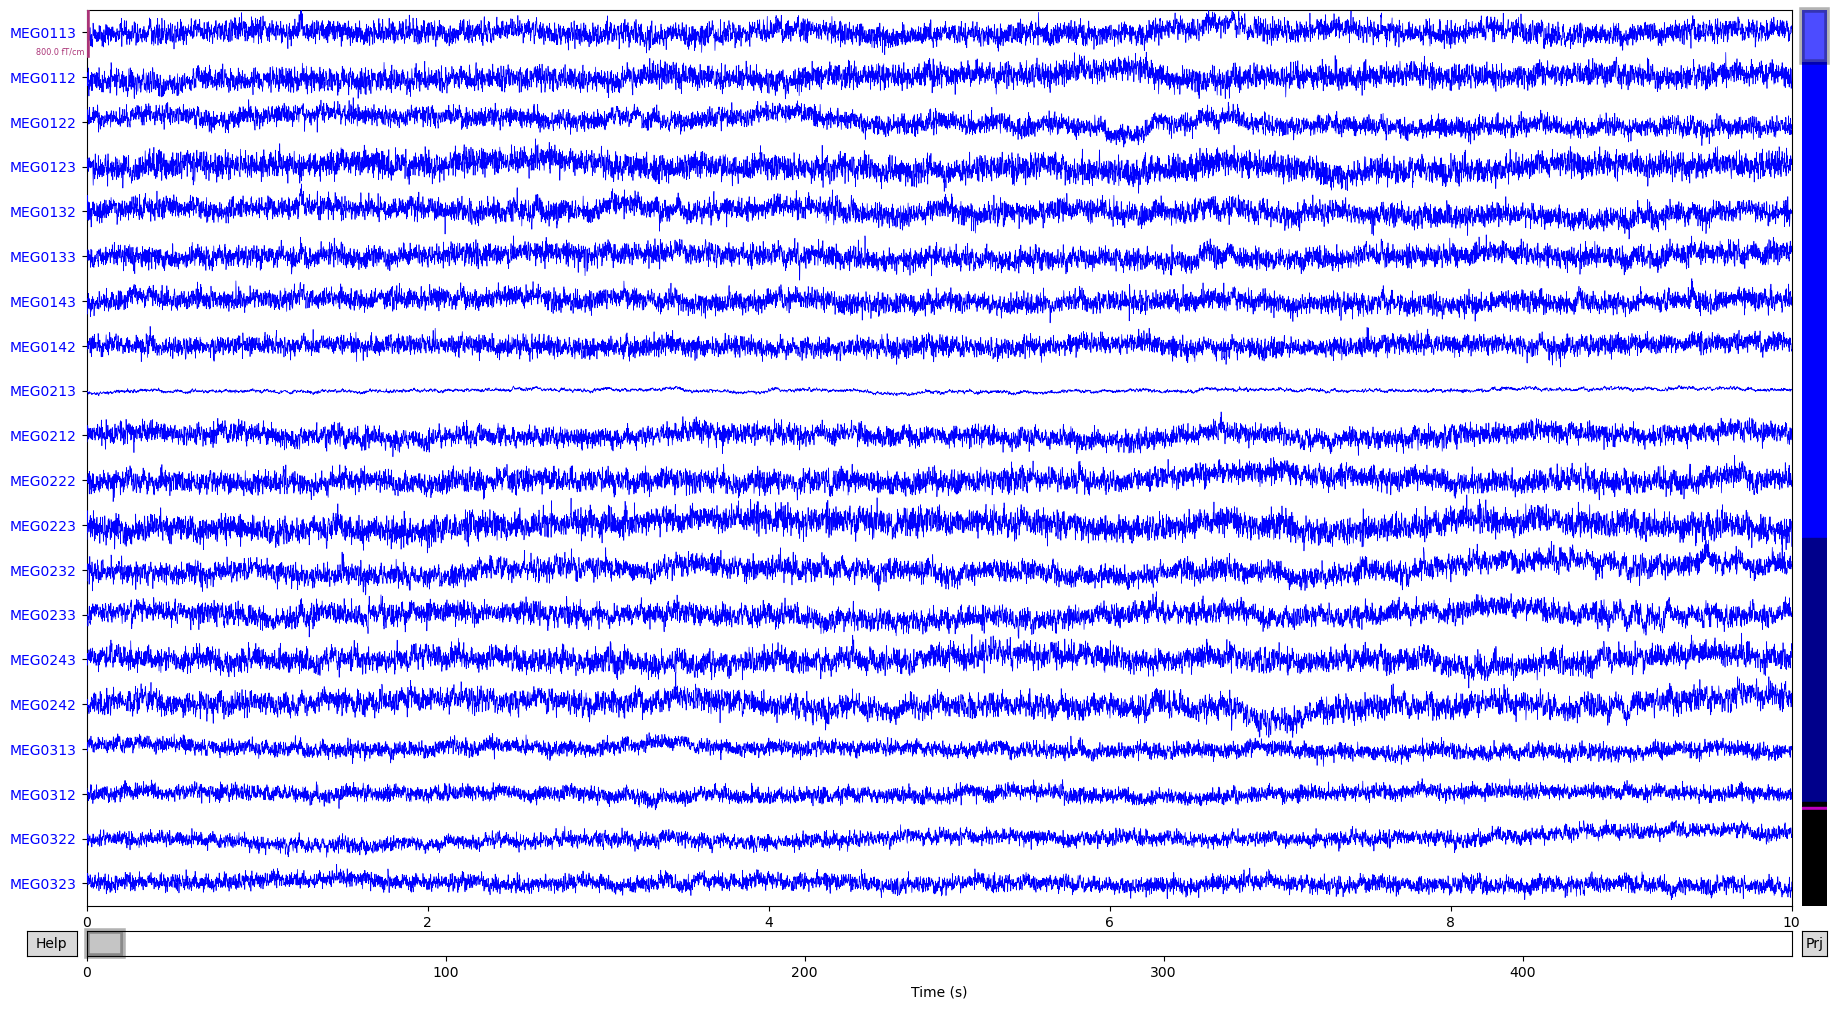

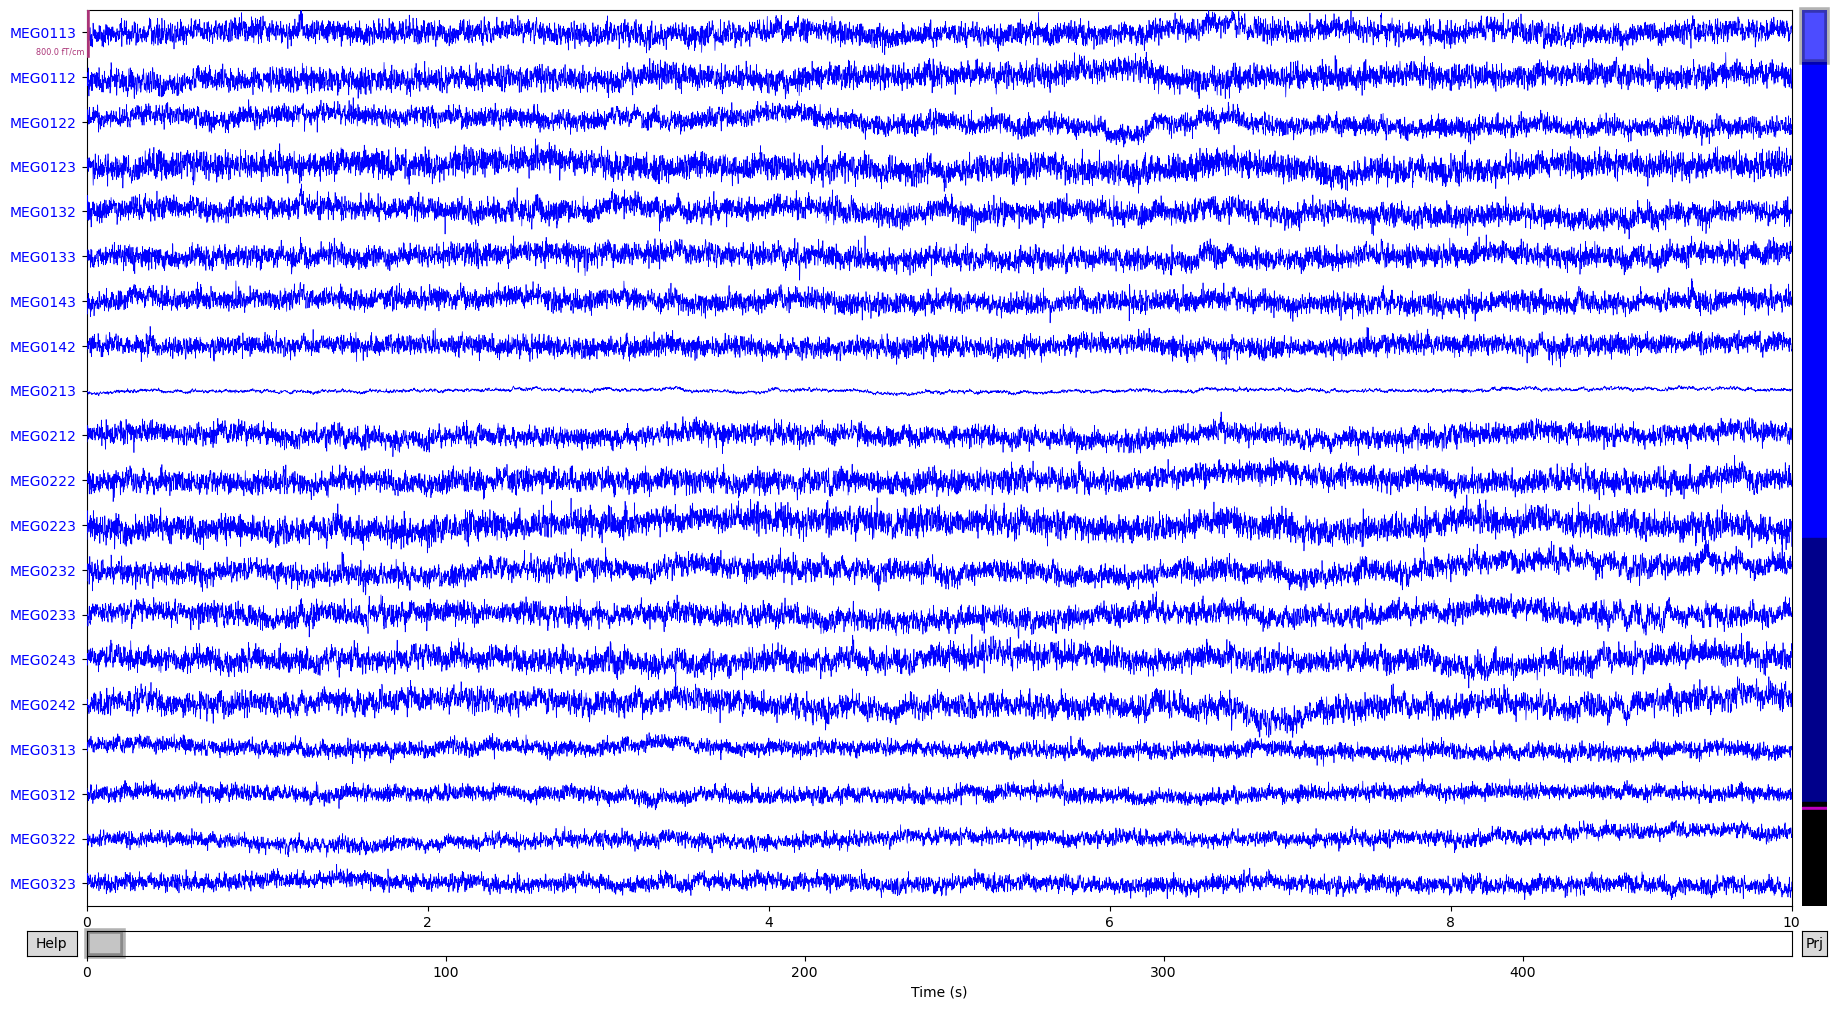

Channels marked as bad:
none


In [27]:
import mne
mne.viz.set_3d_backend("notebook")
raw.plot()

In [26]:
pip install pyvista

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.5 MB/s eta 0:00:001 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 10.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


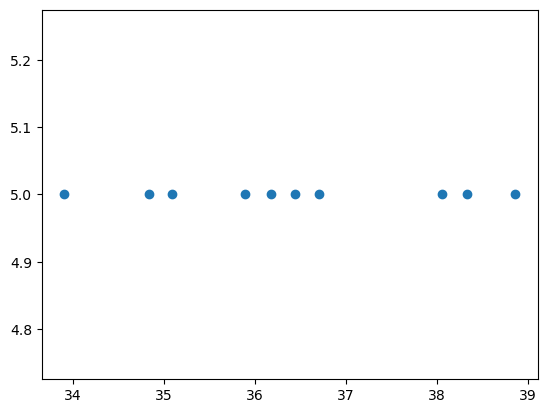

In [21]:
%matplotlib qt
plt.plot(events[:, 0][:10] / 1000, events[:, 2][:10], 'o')
plt.show()